# Introducción A Cobrapy Con Modelo De Broddrick - Implementación En Jupyter Notebook ☻

________________________________________________________________________________________________


## 1. Init CobraPy

### Comprobar Kernel para correr el Notebook, que los requerimientos del ambiente en conda si funcionen

In [1]:
!conda env list
!conda list cobra
!which python

# conda environments:
#
base                     /home/fabian11lrg/anaconda3
cobrapy_env           *  /home/fabian11lrg/anaconda3/envs/cobrapy_env

# packages in environment at /home/fabian11lrg/anaconda3/envs/cobrapy_env:
#
# Name                    Version                   Build  Channel
cobra                     0.24.0             pyhd8ed1ab_0    conda-forge
/home/fabian11lrg/anaconda3/envs/cobrapy_env/bin/python


### Import cobra to python script

In [4]:
from importlib_metadata import files
import cobra

### Definición del Singleton de configuración

In [3]:
cobra_config = cobra.Configuration()

print("(" + str(cobra_config.lower_bound) + ", "+ str(cobra_config.upper_bound) + ")")
print("Similar as:")
print(cobra_config.bounds)

(-1000.0, 1000.0)
Similar as:
(-1000.0, 1000.0)


### Changing Solver

In [4]:
cobra_config.solver = "glpk_exact"

## 2. Pruebas iniciales de CobraPy - Llamar modelo de Broddrick

### Llamar modelo de Broddrick a CobraPy

In [5]:
from pathlib import Path

Here = Path().absolute()

ModelPath = str(Here) + '/Model_iJB785.mat'

print(ModelPath)

/mnt/c/users/flron/OneDrive/Tesis/Cobrapy Model Development/Models Test/Model_iJB785.mat


### Load the Model file to CobraPy

In [6]:
model = cobra.io.load_matlab_model(ModelPath)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


### Get the Solver of the Model

Place the model and solver inside a text file

In [7]:
with open(str(Here) + "/SolverCobra.txt", "w", encoding="utf-8") as f:
    f.write(str(model.solver))

### Modificando valores de reacciones y creando reacciones

In [8]:
cobra_config.bounds = -10, 20

cobra.Reaction("R1")
cobra.Reaction("R2", lower_bound=None)

Reaction identifier,R2
Name,
Memory address,0x07f9e27ac3d30
Stoichiometry,<=> <=>
GPR,
Lower bound,-10
Upper bound,20


_____________________________________________________________

### Probando rastreo de constrains en reacciones específicas

In [7]:
ObjReact = model.reactions.CYTBD4cm
ObjReact.metabolites

{<Metabolite o2_c at 0x7f01567ce3d0>: -1.0,
 <Metabolite h_p at 0x7f0156762490>: 4.0,
 <Metabolite h2o_c at 0x7f015676bcd0>: 2.0,
 <Metabolite h_c at 0x7f015676bd30>: -4.0,
 <Metabolite pq_cm at 0x7f0156777400>: 2.0,
 <Metabolite pqh2_cm at 0x7f01567801c0>: -2.0}

## 3. Model, Reactions and metabolites

### Creating a new reaction inside Model

In [10]:
from cobra import Reaction, Metabolite

rxn = Reaction('R_3OAS140')
rxn.name = '3 oxoacyl acyl carrier protein synthase n C140 '
rxn.subsystem = 'Cell Envelope Biosynthesis'
rxn.lower_bound = 0. # This is the default
rxn.upper_bound = 1000. #This is the default

rxn

Reaction identifier,R_3OAS140
Name,3 oxoacyl acyl carrier protein synthase n C140
Memory address,0x07f9e27ac3b20
Stoichiometry,--> -->
GPR,
Lower bound,0.0
Upper bound,1000.0


Creating a new metabolite

In [11]:
omrsACP_c = Metabolite(
    'M3omrsACP_c', 
    formula='C25H45N2O9PRS',
    name='3-Oxotetradecanoyl-acyl-carrier-protein',
    compartment='c'
)

omrsACP_c

Metabolite identifier,M3omrsACP_c
Name,3-Oxotetradecanoyl-acyl-carrier-protein
Memory address,0x07f9e27ac37f0
Formula,C25H45N2O9PRS
Compartment,c
In 0 reaction(s),


Adding metabolites with stoichiometry to reaction

In [12]:
_ = model.metabolites

rxn.add_metabolites({
    _.malACP_c: -1.0,
    _.h_c: -1.0,
    _.ddcaACP_c: -1.0,
    _.co2_c: 1.0,
    _.ACP_c: 1.0,
    omrsACP_c: 1.0
})

rxn.reaction

'ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c'

```gene_reaction_rule``` boolean representation of gene requirements for this reaction to be active

In [13]:
rxn.gene_reaction_rule = 'Synpcc7942_0001 or STM1197'
rxn.genes

frozenset({<Gene STM1197 at 0x7f9e27ac3df0>,
           <Gene Synpcc7942_0001 at 0x7f9e604be040>})

In [14]:
def model_printProp():
    print(f'{len(model.reactions)} reactions initially')
    print(f'{len(model.metabolites)} metabolites initially')
    print(f'{len(model.genes)} genes initially')

model_printProp()

850 reactions initially
768 metabolites initially
785 genes initially


Adding the new reaction to model

In [15]:
model.add_reactions([rxn])

# The objects have been added to the model
model_printProp() 

851 reactions initially
769 metabolites initially
786 genes initially


In [16]:
cobra.io.save_matlab_model(model,'Prueba.mat')

In [17]:
model.reactions.R_3OAS140

Reaction identifier,R_3OAS140
Name,3 oxoacyl acyl carrier protein synthase n C140
Memory address,0x07f9e27ac3b20
Stoichiometry,ddcaACP_c + h_c + malACP_c --> ACP_c + M3omrsACP_c + co2_c Dodecanoyl-[acyl-carrier protein] + H+ + Malonyl-[acyl-carrier protein] --> Acyl-carrier protein + 3-Oxotetradecanoyl-acyl-carrier-protein + CO2
GPR,Synpcc7942_0001 or STM1197
Lower bound,0.0
Upper bound,1000.0


### Iterate through the objects in the model

In [18]:
def printPropList(PropVar, SubProp):
    print(f" {PropVar}")
    print("-----------------")
    for rxn_i in getattr(model, PropVar):
        print("%s : %s" % (rxn_i.id, getattr(rxn_i, SubProp)))

printPropList("metabolites", "name")


 metabolites
-----------------
gam6p_c : D-Glucosamine 6-phosphate
cgly_c : Cys-Gly
achms_c : O-Acetyl-L-homoserine
pccu2p_u : Oxidized plastocyanin
octe9ACP_c : Oleoyl-[acyl-carrier protein]
fdp_c : D-Fructose 1,6-bisphosphate
agm_c : Agmatine
5caiz_c : 5-Carboxyamino-1-(5-phospho-D-ribosyl)imidazole
pep_c : Phosphoenolpyruvate
coa_c : CoA
hgbam_c : Hydrogenobyrinate a,c diamide
nac_c : Nicotinate
r3mmal_c : D-erythro-3-Methylmalate
leu__L_c : L-Leucine
ahcys_c : S-Adenosyl-L-homocysteine
ru5p__D_c : D-Ribulose 5-phosphate
14dhncoa_c : 1,4-Dihydroxy-2-naphthoyl-CoA
h2o_cx : H2O
h2s_c : Hydrogen sulfide
orot_c : Orotate
g1p_c : D-Glucose 1-phosphate
3hdecACP_c : (3R)-3-Hydroxydecanoyl-[acyl-carrier protein]
na1_c : Sodium
2pglyc_c : 2-Phosphoglycolate
ala_B_c : beta-Alanine
glyc3p_c : sn-Glycerol 3-phosphate
pqh2_um : Plastoquinol-9
26dap_LL_c : LL-2,6-Diaminoheptanedioate
ddcaACP_c : Dodecanoyl-[acyl-carrier protein]
2pglyc_cx : 2-Phosphoglycolate
trdox_c : Thioredoxin disulfide
3odde

### Create a Tuple for each gene, reporting the reactions related with 

In [19]:
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" % (x.id, "{"+", ".join(associated_ids)+"}"))

Synpcc7942_1448 is associated with reactions: {QULNS}
Synpcc7942_0707 is associated with reactions: {ORNDC}
Synpcc7942_1029 is associated with reactions: {ILETA, VALTA, LEUTA}
Synpcc7942_0596 is associated with reactions: {MSBENZMT}
Synpcc7942_2561 is associated with reactions: {DESAT16a, DESAT18a}
Synpcc7942_1007 is associated with reactions: {FUM}
Synpcc7942_1225 is associated with reactions: {PHYFXOR}
Synpcc7942_2258 is associated with reactions: {VPAMTr}
Synpcc7942_2046 is associated with reactions: {GLYCL}
Synpcc7942_2047 is associated with reactions: {GLYCL}
Synpcc7942_2308 is associated with reactions: {GLYCL}
Synpcc7942_2497 is associated with reactions: {NDPK3, NDPK7, NDPK2, NDPK8, NDPK6, NDPK1, NDPK4, NDPK5}
Synpcc7942_1597 is associated with reactions: {GTPCI}
Synpcc7942_0777 is associated with reactions: {MTHFD, MTHFC}
Synpcc7942_2062 is associated with reactions: {LYCBC2, LYCBC1}
Synpcc7942_0034 is associated with reactions: {ORNTA}
Synpcc7942_1086 is associated with react

## 4. Objective

In [20]:
model.objective = 'R_3OAS140'

The created objective is a symbolic algebraic expression

In [21]:
print("The OF model expresion is: %s" % model.objective.expression)
print("The OF model direction is: %s" % model.objective.direction)

The OF model expresion is: 1.0*R_3OAS140 - 1.0*R_3OAS140_reverse_60acb
The OF model direction is: max


In [22]:
model.optimize()

,fluxes,reduced_costs
QULNS,0.0,0.0
ORNDC,0.0,0.0
LEUTA,0.0,0.0
MSBENZMT,0.0,0.0
DESAT18a,0.0,0.0
...,...,...
ASPO5,0.0,0.0
MNHNAtpp,0.0,0.0
PCXHtpp,0.0,0.0
NGAM,0.0,0.0


## 5. Model Validation

### Exchanging with other tools, export the model to SBML

In [23]:
import tempfile
from pprint import pprint
from cobra.io import write_sbml_model, validate_sbml_model

with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
    write_sbml_model(model, filename=f_sbml.name)
    report = validate_sbml_model(filename=f_sbml.name)

pprint(report)

SBML errors in validation, check error log for details.
COBRA warnings in validation, check error log for details.


(<Model iJB785 at 0x7f9e27aea3a0>,
 {'COBRA_CHECK': ["Metabolite 'bm_pro_c' formula "
                  "'H70.5616C44.9625O13.1713S0.2669N12.1054R-1.0' not "
                  'alphanumeric',
                  "Metabolite 'bm_cw_c' formula "
                  "'H64.91952478P0.054836981C40.939065111O23.373969692N4.797082835R-1.0' "
                  'not alphanumeric',
                  "Metabolite 'bm_pigm_c' formula "
                  "'H85.915933451C64.636061545Mg0.659309453O5.045035935N2.879863692R-1.0' "
                  'not alphanumeric',
                  "Metabolite 'bm_cofactors_c' formula "
                  "'H96.4365P0.8756C37.9375K0.0017O6.9303S0.1371Na0.0001Fe1.7854N14.7005R-1.0Co0.0057' "
                  'not alphanumeric',
                  "Metabolite 'bm_rna_c' formula "
                  "'H33.59035P3.1168C29.60979O21.81767N11.77262R-1.0' not "
                  'alphanumeric',
                  "Metabolite 'bm_dna_c' formula "
                  "'H36.44203P3.247

## 6. Exchanges, Sinks and Demands

### Exchanges

Exchange reversible reactions form extracellular to intracellular space 

In [24]:
print("exchanges", model.exchanges)

exchanges [<Reaction EX_h2o_e at 0x7f9e2789c190>, <Reaction EX_o2_e at 0x7f9e2789c4c0>, <Reaction EX_co2_e at 0x7f9e2789a730>, <Reaction EX_leu__L_e at 0x7f9e2789a7c0>, <Reaction EX_cobalt2_e at 0x7f9e2789a850>, <Reaction EX_zn2_e at 0x7f9e2789af40>, <Reaction EX_so4_e at 0x7f9e2789a310>, <Reaction EX_spmd_e at 0x7f9e2789a1c0>, <Reaction EX_ca2_e at 0x7f9e27895b50>, <Reaction EX_nh4_e at 0x7f9e27895880>, <Reaction EX_arg__L_e at 0x7f9e27895fa0>, <Reaction EX_gln__L_e at 0x7f9e27895e80>, <Reaction EX_mn2_e at 0x7f9e278ab070>, <Reaction EX_hco3_e at 0x7f9e278ab100>, <Reaction EX_mg2_e at 0x7f9e278ab190>, <Reaction EX_ptrc_e at 0x7f9e278ab220>, <Reaction EX_fe2_e at 0x7f9e278ab2b0>, <Reaction EX_cu2_e at 0x7f9e278ab340>, <Reaction EX_k_e at 0x7f9e278ab3d0>, <Reaction EX_no3_e at 0x7f9e278ab460>, <Reaction EX_fe3_e at 0x7f9e278ab4f0>, <Reaction EX_mobd_e at 0x7f9e278ab580>, <Reaction EX_ni2_e at 0x7f9e278ab610>, <Reaction EX_na1_e at 0x7f9e278ab6a0>, <Reaction EX_cynt_e at 0x7f9e278ab730>,

In [25]:
print("demands", model.demands)

demands [<Reaction DM_for_c at 0x7f9e279a2460>, <Reaction DM_h2_c at 0x7f9e2790d820>, <Reaction DM_dialurate_c at 0x7f9e278e4c10>, <Reaction DM_co_c at 0x7f9e278f68b0>, <Reaction DM_5drib_c at 0x7f9e2788e940>, <Reaction DM_amob_c at 0x7f9e27854b80>, <Reaction DM_pho_loss_c at 0x7f9e27817c10>, <Reaction DM_fum_c at 0x7f9e277eeee0>, <Reaction DM_succ_c at 0x7f9e277eed30>, <Reaction DM_akg_c at 0x7f9e277f3190>, <Reaction DM_ac_c at 0x7f9e277f3490>, <Reaction DM_lac__D_c at 0x7f9e277f3520>]


In [26]:
print("sinks", model.sinks)

sinks []


### Creating an Exchange Reaction

Add Metabolites

In [27]:
model.add_metabolites([
    Metabolite('photonFLRG',
    formula='',
    name='nu_model',
    compartment='e'
    ), 
    Metabolite('s_0',
    charge=-4,
    formula='R',
    name='KokCycleProt'
    )
])

Verify the metabolites added in the model

In [28]:
def printMet(MetName):
    
    def ObjMetf(MetName):
        return getattr(model.metabolites, MetName)

    ObjMet = ObjMetf(MetName)
    print('Metabolite: %s' % ObjMet) 

    print("Formula: %s" % getattr(ObjMet, 'formula'))
    print("Charge: %s" % getattr(ObjMet, 'charge'))
    print("Name: %s" % getattr(ObjMet, 'name'))

    

model.metabolites
Met_i = 's_0'
printMet(Met_i)

Metabolite: s_0
Formula: R
Charge: -4
Name: KokCycleProt


Create the exchange reaction

In [29]:
## model.add_boundary(model.metabolites.get_by_id("photonFLRG"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("s_0"), type="sink")

Reaction identifier,SK_s_0
Name,KokCycleProt sink
Memory address,0x07f9e24a0beb0
Stoichiometry,s_0 <=> KokCycleProt <=>
GPR,
Lower bound,-10
Upper bound,20


A trick to get all metabolic reactions is

In [30]:
set(model.reactions) - set(model.boundary)

{<Reaction 2PGLYCtcx at 0x7f9e27888cd0>,
 <Reaction 3HAD100 at 0x7f9e279894c0>,
 <Reaction 3HAD120 at 0x7f9e27888e80>,
 <Reaction 3HAD140 at 0x7f9e27903490>,
 <Reaction 3HAD160 at 0x7f9e279ec100>,
 <Reaction 3HAD180 at 0x7f9e27968100>,
 <Reaction 3HAD40_1 at 0x7f9e2792fe80>,
 <Reaction 3HAD60 at 0x7f9e27a34b80>,
 <Reaction 3HAD80 at 0x7f9e27994ac0>,
 <Reaction 3OAR100 at 0x7f9e279d81f0>,
 <Reaction 3OAR120 at 0x7f9e279cc070>,
 <Reaction 3OAR140 at 0x7f9e2799a7c0>,
 <Reaction 3OAR160 at 0x7f9e279a2d60>,
 <Reaction 3OAR180 at 0x7f9e279818b0>,
 <Reaction 3OAR40_1 at 0x7f9e278cd9d0>,
 <Reaction 3OAR60 at 0x7f9e27a34fd0>,
 <Reaction 3OAR80 at 0x7f9e27981700>,
 <Reaction 3OAS100 at 0x7f9e278d79d0>,
 <Reaction 3OAS120 at 0x7f9e279282e0>,
 <Reaction 3OAS140 at 0x7f9e27989eb0>,
 <Reaction 3OAS160 at 0x7f9e2788e430>,
 <Reaction 3OAS180 at 0x7f9e278f1a30>,
 <Reaction 3OAS60 at 0x7f9e2793b520>,
 <Reaction 3OAS80 at 0x7f9e2794a670>,
 <Reaction 3PEPTabcpp at 0x7f9e277d3700>,
 <Reaction 3PGtcx at 0x7

# SIMULATING WITH FBA

Simulations using FBA can be solved as follows (min() or Max())

###### optimize()

In [31]:
%%time
solution = model.optimize()
print(solution.objective_value)

0.0
CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 42.4 ms


###### slim_optimize()

In [32]:
%%time
solution = model.slim_optimize()
print(solution)

0.0
CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 21.5 ms


### Analyzing FBA solutions

Model Summarize 

In [33]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


#### Redox Balance Brief

In [34]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
Percent,Flux,Reaction,Definition


#### Energy Balance summary

In [35]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
Percent,Flux,Reaction,Definition


### BIOMASS OBJECTIVE FUNCTION

In [39]:
model.reactions.BOF.summary()

In [ ]:
Biomass_rxn = model.reactions.get_by_id("BOF")
Biomass_rxn.name


'Biomass objective function'

Get the BOF's linear coefficient

In [ ]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction BM_PIGMENTS at 0x7fa893a487c0>: 1.0,
 <Reaction BOF at 0x7fa8939d2a60>: 2.0,
 <Reaction ATPM at 0x7fa8939dba00>: 1.0}

### Modifying the Objective Function

Setting a Dictionary with the interested reactions

$ FBA: S_{n\times m}\hat{\nu}_{m} = \frac{\textit{d}\hat{C}}{\textit{d}t}_n = 0_{n}$

###### Where S is the Stechiometric Metabolic Matrix, with n metabolites and m reactions

In [ ]:
_ = model.reactions

RxnDict = {
    _.BOF: 2, 
    _.BM_PIGMENTS: 1,
    _.ATPM: 1
}

Changing the model Objective

In [ ]:
model.objective = RxnDict
linear_reaction_coefficients(model)

{<Reaction BM_PIGMENTS at 0x7fa893a487c0>: 1.0,
 <Reaction BOF at 0x7fa8939d2a60>: 2.0,
 <Reaction ATPM at 0x7fa8939dba00>: 1.0}

In [ ]:
model.optimize()

,fluxes,reduced_costs
QULNS,1.400416e-05,0.0
ORNDC,6.944211e-06,0.0
LEUTA,0.000000e+00,0.0
MSBENZMT,9.644738e-07,0.0
DESAT18a,5.262120e-03,0.0
...,...,...
DM_lac__D_c,0.000000e+00,0.0
ASPO5,1.400416e-05,0.0
MNHNAtpp,0.000000e+00,0.0
PCXHtpp,0.000000e+00,0.0


## Production Envelopes

Phenotype phase plane

Import library to make a production Envelope

In [40]:
import cobra.test
from cobra.flux_analysis import production_envelope

In [41]:
prod_env= production_envelope(
    model, ["EX_co2_e"], objective="EX_o2_e", carbon_sources="EX_co2_e"
)

/home/fabian11lrg/anaconda3/envs/cobrapy_env/lib/python3.9/site-packages/cobra/flux_analysis/phenotype_phase_plane.py:273: RuntimeWarning: divide by zero encountered in double_scalars
  return carbon_output_flux / carbon_input_flux


In [42]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_co2_e
0,EX_co2_e,1.005151e-06,0.0,3.672531e-07,54.429536,0.0,19.886979,-1.990000
1,EX_co2_e,8.993456e-07,0.0,3.672531e-07,54.324799,0.0,22.183854,-1.780526
2,EX_co2_e,7.935403e-07,0.0,3.672531e-07,54.220062,0.0,25.093228,-1.571053
3,EX_co2_e,6.877349e-07,0.0,3.672531e-07,54.115326,0.0,28.897795,-1.361579
4,EX_co2_e,5.819295e-07,0.0,3.672531e-07,54.010589,0.0,34.085841,-1.152105


In [43]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='EX_co2_e'>

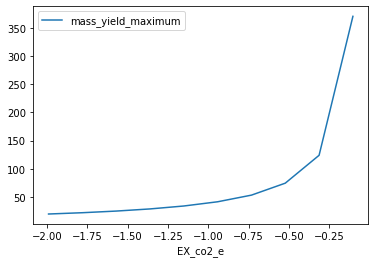

In [45]:
prod_env.plot(kind='line', x='EX_co2_e', y='mass_yield_maximum')